# Prep

Setting up some prior functionality

In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

2.6.0+cu126 True


# Load a model

First we have to decide if our model should be pretrained. 

This greatly depends on the size of a dataset. Smaller datasets rely more on finetuning. 

In [2]:
pretrained = True

if pretrained:
    # Get pretrained weights
    checkpoint = torch.hub.load_state_dict_from_url(
                url='https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth',
                map_location='cpu',
                check_hash=True)
    # Remove class weights
    del checkpoint["model"]["class_embed.weight"]
    del checkpoint["model"]["class_embed.bias"]

    # SaveOGH
    torch.save(checkpoint,
               'detr-r50_no-class-head.pth')

# Dataset

Our dataset should be loadable as a COCO format

This allows us to use the pycocotools to load the data dict for the main python script

In [3]:
dataset_file = "coco" # alternatively, implement your own coco-type dataset loader in datasets and add this "key" to datasets/__init__.py

dataDir='datasets/sentinel2_coco_panchromatic' 
num_classes = 2 # this int should be the actual number of classes + 1 (for no class)

outDir = 'outputs/models/sentinel2_panchromatic_finetune_20_epochs'
resume = "detr-r50_no-class-head.pth" if pretrained else "scratch"

# Training

We use the main.py script to run our training

In [4]:
!python main.py \
  --dataset_file $dataset_file \
  --coco_path $dataDir \
  --output_dir $outDir \
  --resume $resume \
  --num_classes $num_classes \
  --lr 1e-5 \
  --lr_backbone 1e-6 \
  --epochs 20

Not using distributed mode
git:
  sha: eed55f3f8749b2da8ce3ae0e54e4420b93b1f685, status: has uncommited changes, branch: master

Namespace(lr=1e-05, lr_backbone=1e-06, batch_size=2, weight_decay=0.0001, epochs=20, lr_drop=200, clip_max_norm=0.1, num_classes=2, frozen_weights=None, backbone='resnet50', dilation=False, position_embedding='sine', enc_layers=6, dec_layers=6, dim_feedforward=2048, hidden_dim=256, dropout=0.1, nheads=8, num_queries=100, pre_norm=False, masks=False, aux_loss=True, set_cost_class=1, set_cost_bbox=5, set_cost_giou=2, mask_loss_coef=1, dice_loss_coef=1, bbox_loss_coef=5, giou_loss_coef=2, eos_coef=0.1, dataset_file='coco', coco_path='datasets/sentinel2_coco_panchromatic', coco_panoptic_path=None, remove_difficult=False, output_dir='outputs/models/sentinel2_panchromatic_finetune_20_epochs', device='cuda', seed=42, resume='detr-r50_no-class-head.pth', start_epoch=0, eval=False, num_workers=2, world_size=1, dist_url='env://', distributed=False)
Building a DETR mode

c:\Users\tobia\anaconda3\envs\detr\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tobia\anaconda3\envs\detr\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Epoch: [12]  [240/766]  eta: 0:02:50  lr: 0.000010  class_error: 27.27  loss: 9.7238 (10.1913)  loss_ce: 0.1962 (0.2436)  loss_bbox: 0.0803 (0.1456)  loss_giou: 1.3174 (1.2768)  loss_ce_0: 0.2915 (0.3177)  loss_bbox_0: 0.0745 (0.1516)  loss_giou_0: 1.3308 (1.3230)  loss_ce_1: 0.2681 (0.2988)  loss_bbox_1: 0.0665 (0.1458)  loss_giou_1: 1.1665 (1.2639)  loss_ce_2: 0.2229 (0.2723)  loss_bbox_2: 0.0751 (0.1447)  loss_giou_2: 1.3113 (1.2716)  loss_ce_3: 0.2303 (0.2563)  loss_bbox_3: 0.0734 (0.1471)  loss_giou_3: 1.2378 (1.2638)  loss_ce_4: 0.2174 (0.2475)  loss_bbox_4: 0.0774 (0.1460)  loss_giou_4: 1.3508 (1.2753)  loss_ce_unscaled: 0.1962 (0.2436)  class_error_unscaled: 25.0000 (27.5364)  loss_bbox_unscaled: 0.0161 (0.0291)  loss_giou_unscaled: 0.6587 (0.6384)  cardinality_error_unscaled: 1.0000 (2.7573)  loss_ce_0_unscaled: 0.2915 (0.3177)  loss_bbox_0_unscaled: 0.0149 (0.0303)  loss_giou_0_unscaled: 0.6654 (0.6615)  cardinality_error_0_unscaled: 3.5000 (6.4357)  loss_ce_1_unscaled: 0.26

# Results

Quick and easy overview of the training results

In [5]:
from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path(outDir)]

c:\repos\detr-fork\util\plot_utils.py:68: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inter = df.interpolate()


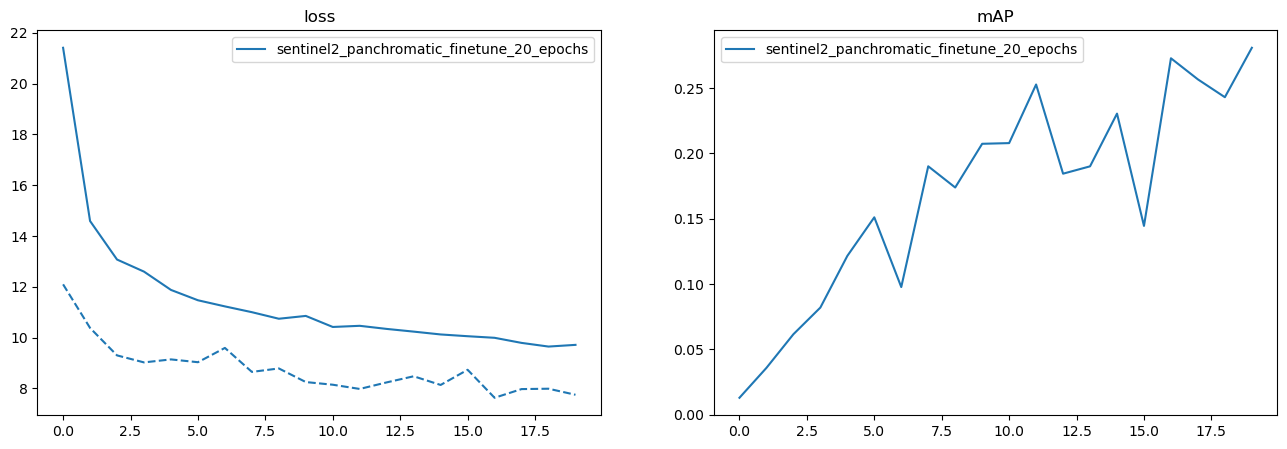

In [6]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

c:\repos\detr-fork\util\plot_utils.py:68: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inter = df.interpolate()
c:\repos\detr-fork\util\plot_utils.py:68: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inter = df.interpolate()
c:\repos\detr-fork\util\plot_utils.py:68: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inter = df.interpolate()


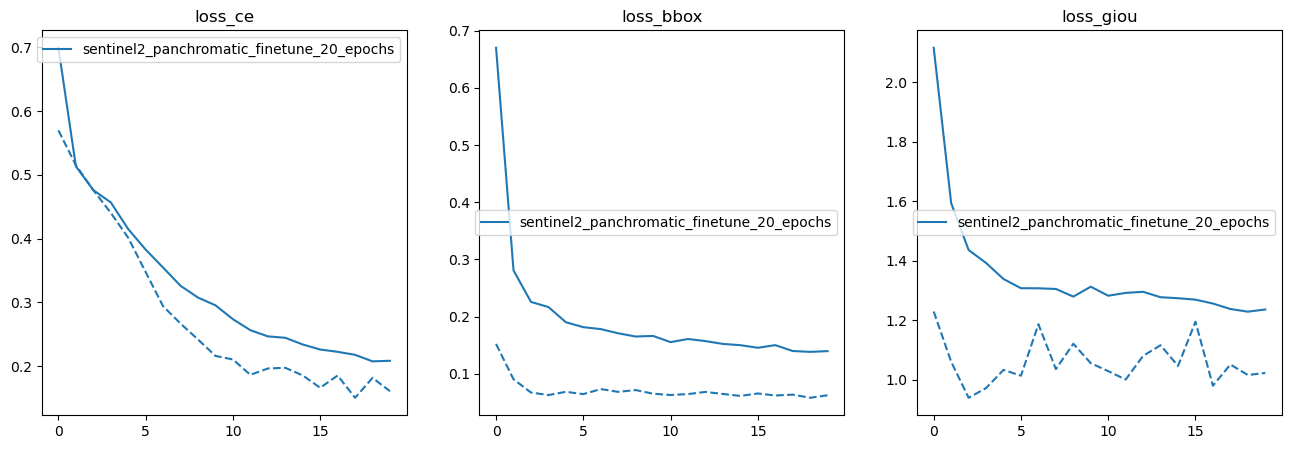

In [7]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )

plot_logs(log_directory,
          fields_of_interest)

c:\repos\detr-fork\util\plot_utils.py:68: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inter = df.interpolate()
c:\repos\detr-fork\util\plot_utils.py:68: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inter = df.interpolate()


PermissionError: [Errno 13] Permission denied: 'outputs\\models\\sentinel2_panchromatic_finetune_20_epochs'

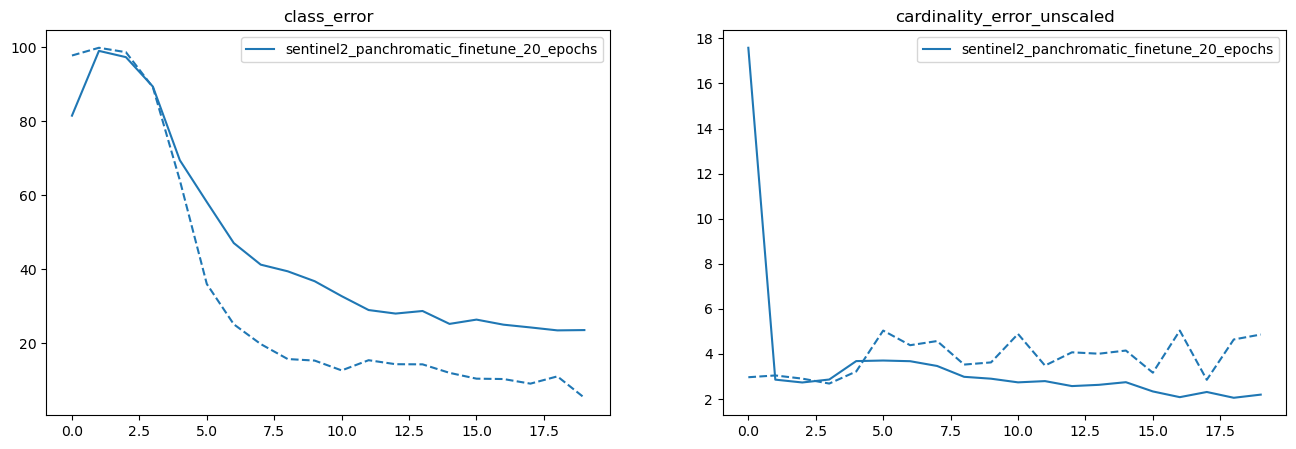

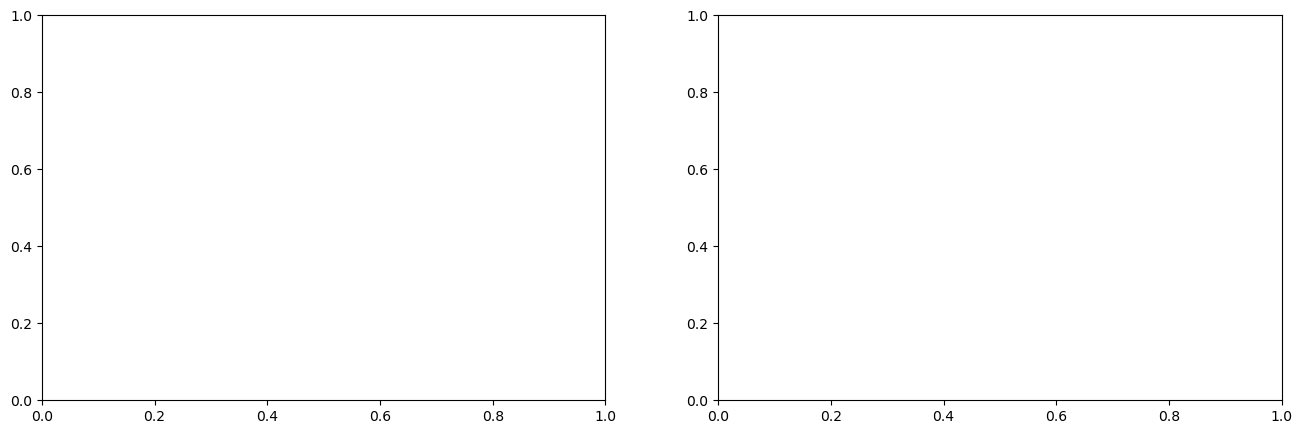

In [8]:


fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)   

from util.plot_utils import plot_precision_recall
plot_precision_recall(log_directory)